In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:20.2f}'.format
pd.set_option('display.max_columns', 999)

# Data exploration

In [2]:
df = pd.read_excel("online_retail_II.xlsx", sheet_name=0)

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [5]:
df.describe(include = 'O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [7]:
df[df["Quantity"] < 0].head(10)
# C at start of invoice is cancellation

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [8]:
# Checking if invoice is a string of 6 digits
df["Invoice"] = df["Invoice"].astype(str)
df[df["Invoice"].str.match("^\\d{6}$") == False] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [9]:
# What other types are there, apart from 6 digits
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [10]:
# A = Adjust bad debt 
df[df["Invoice"].str.startswith("A") == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [11]:
# checking stock codes
# a lot of stock codes which don't fall under the pattern of 5 digits
df["StockCode"] = df["StockCode"].astype(str)
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

## Stock Codes note
- 5 digits = normal pattern
- POST = POSTAGE fees - ignore
- DOT = DOTCOM POSTAGE fees - ignore
- D = Discount? - ignore 
- DCGS = ??? - all customer IDs are null - ignore
- M = on its own, manual transaction - exclude
- M (at end) = looks fine - ignore
- BANK - bank charges - ignore (all quantity negative)
- TEST - test product - ignore
- git - giftshop voucher (Dotcomgiftshop) - ignore
- PADS - cushion pads (free price to match cushions but has customer ID) - allow
- ADJUST - adjustments made  but some have negative quantity - ignore
- S = samples - ignore
- B = adjust bad debt - ignore
- AMZ - Amazon fees probably for shipping - ignore


In [12]:
df[df["StockCode"].str.match("AMAZONFEE") == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440688,C531400,AMAZONFEE,AMAZON FEE,-1,2010-11-08 10:08:00,6706.71,NaN,United Kingdom
440698,531411,AMAZONFEE,AMAZON FEE,1,2010-11-08 10:11:00,6706.71,NaN,United Kingdom
517452,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
519170,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
519251,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
519295,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom


# Data Cleaning

In [13]:
cleaned_df = df.copy()

In [14]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

In [15]:
mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$")  == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [16]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True) 
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]

In [17]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

/tmp/ipykernel_862/1633333693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace=True)


In [18]:
# remove 0 price as there are only total of 28 rows with this
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]

In [19]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [20]:
# dropped around 23% of records
len(cleaned_df) / len(df)

0.7732429238325965

# Feature Engineering


In [21]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [22]:
aggregated_df = cleaned_df.groupby("Customer ID", as_index=False) \
    .agg(
        MonetaryValue = ("SalesLineTotal", "sum"),
        Frequency = ("Invoice", "nunique"),
        LastInvoiceDate = ("InvoiceDate", "max")
    )

In [23]:
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [24]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

max_invoice_date # for purposes of project, make recency calculation from this date

Timestamp('2010-12-09 20:01:00')

In [25]:
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

In [26]:
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


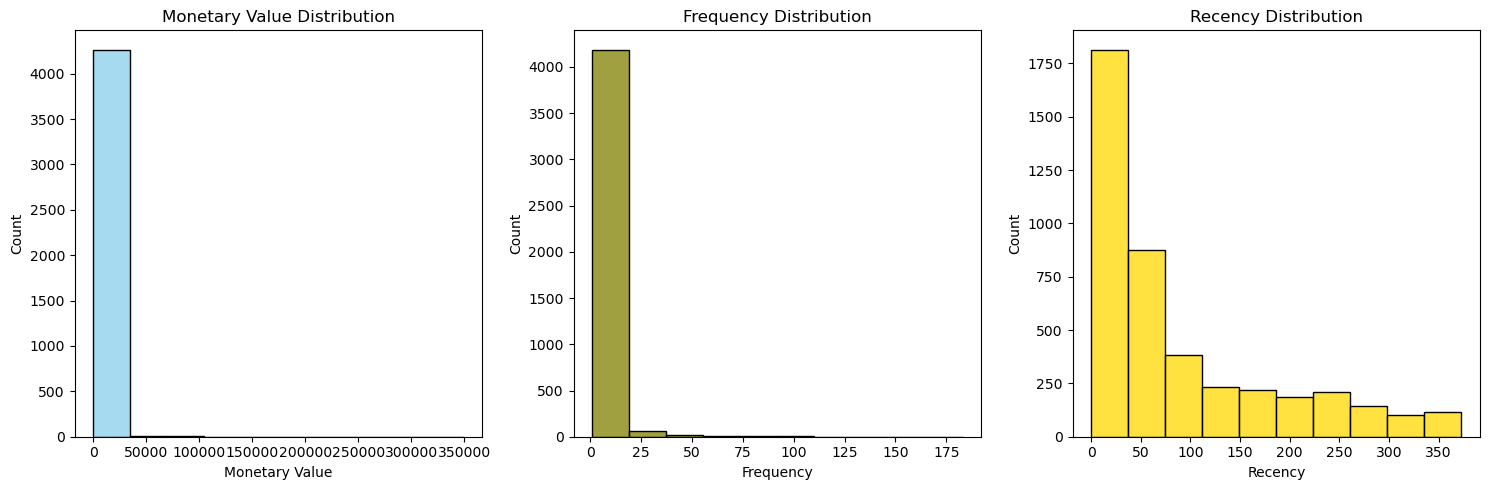

In [27]:
# histogram plot of different features

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.histplot(aggregated_df["MonetaryValue"], bins=10, color="skyblue", edgecolor="black")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
sns.histplot(aggregated_df["Frequency"], bins=10, color="olive", edgecolor="black")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
sns.histplot(aggregated_df["Recency"], bins=10, color="gold", edgecolor="black")
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

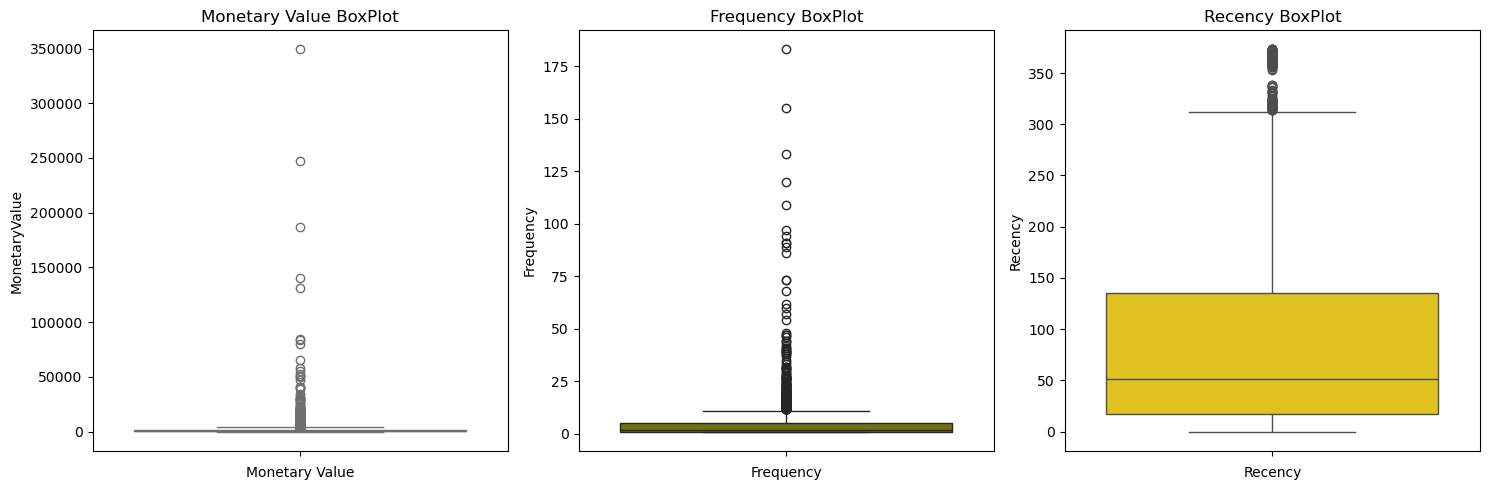

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(aggregated_df["MonetaryValue"], color="skyblue")
plt.title("Monetary Value BoxPlot")
plt.xlabel("Monetary Value")

plt.subplot(1, 3, 2)
sns.boxplot(aggregated_df["Frequency"], color="olive")
plt.title("Frequency BoxPlot")
plt.xlabel("Frequency")

plt.subplot(1, 3, 3)
sns.boxplot(aggregated_df["Recency"], color="gold")
plt.title("Recency BoxPlot")
plt.xlabel("Recency")

plt.tight_layout()
plt.show()

don't want to reject outliers in monetary and frequency as they are possibly one of the most important customers

In [29]:
# separate out the outlier range
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1
M_outlier_range = (M_Q1 - 1.5 * M_IQR, M_Q3 + 1.5 * M_IQR)

F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)
F_IQR = F_Q3 - F_Q1
F_outlier_range = (F_Q1 - 1.5 * F_IQR, F_Q3 + 1.5 * F_IQR)

In [30]:
monetary_outliers = aggregated_df[(aggregated_df["MonetaryValue"] < M_outlier_range[0]) | (aggregated_df["MonetaryValue"] > M_outlier_range[1])]
frequency_outliers = aggregated_df[(aggregated_df["Frequency"] < F_outlier_range[0]) | (aggregated_df["Frequency"] > F_outlier_range[1])]

In [31]:
monetary_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [32]:
frequency_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [33]:

non_outliers = aggregated_df[(~aggregated_df.index.isin(monetary_outliers.index)) 
                             & (~aggregated_df.index.isin(frequency_outliers.index))] 

In [34]:
non_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


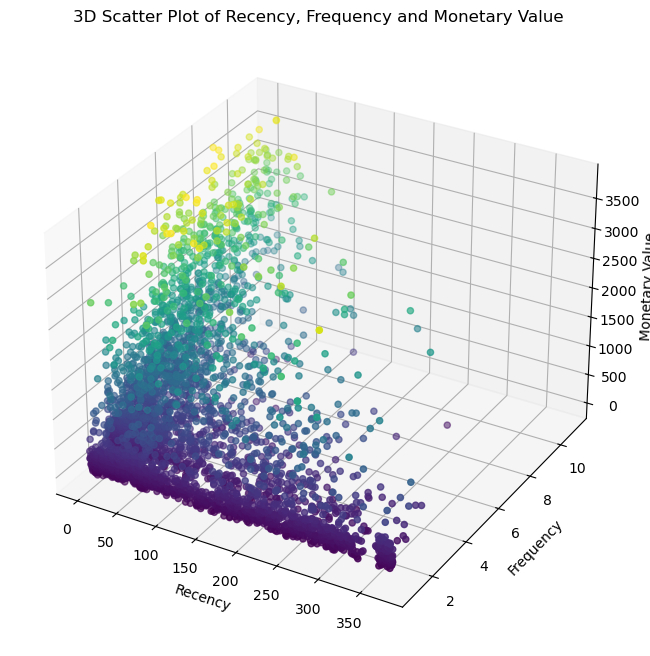

In [35]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers["Recency"], non_outliers["Frequency"], non_outliers["MonetaryValue"], c=non_outliers["MonetaryValue"])

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary Value")

plt.title("3D Scatter Plot of Recency, Frequency and Monetary Value")
plt.show()

In [36]:
# rescaling to prevent monetary value being over emphasized
# using std deviation to scale the values - assumes normal distribution (which is not case but will do for now) - not very skewed data

scaler = StandardScaler()

non_outliers_scaled = non_outliers.copy()
scaled_data = scaler.fit_transform(non_outliers[["MonetaryValue", "Frequency", "Recency"]])

scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers.index, columns=["MonetaryValue", "Frequency", "Recency"])

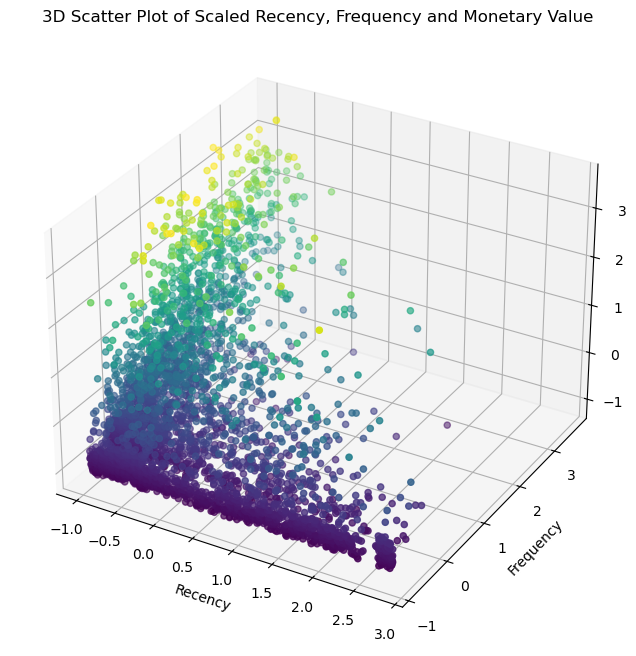

In [37]:
# plot scaled data

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(scaled_data_df["Recency"], scaled_data_df["Frequency"], scaled_data_df["MonetaryValue"], c=scaled_data_df["MonetaryValue"])

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary Value")

plt.title("3D Scatter Plot of Scaled Recency, Frequency and Monetary Value")
plt.show()

# K Means Clustering

/tmp/ipykernel_862/1402307102.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(k_values, silhouette_scores, 'bo-', color="orange")


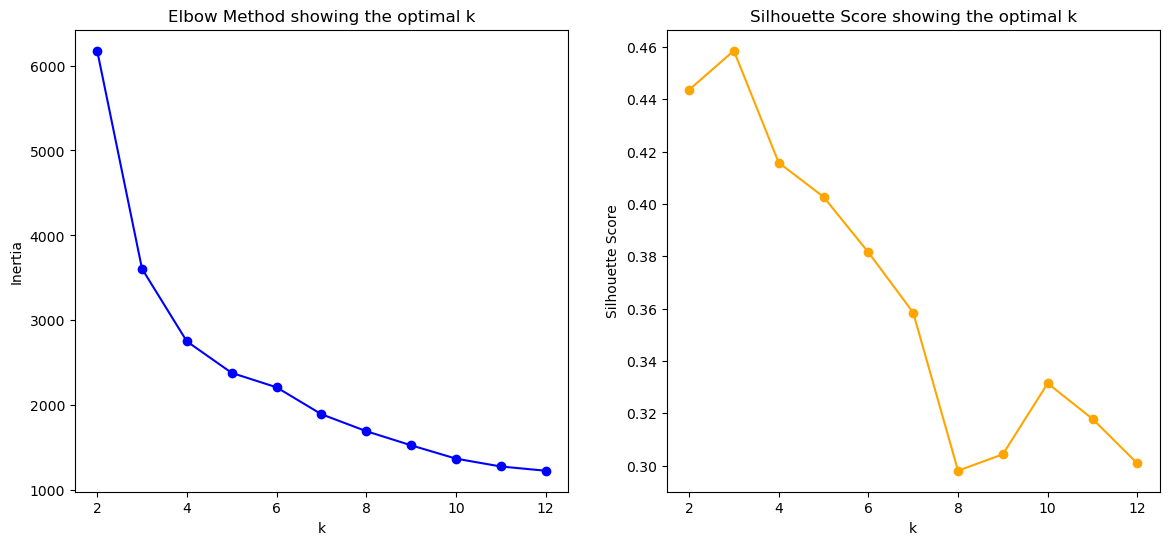

In [38]:
# elbow method to determine optimal number of clusters
import sklearn
max_k = 12
inertia = []
silhouette_scores = []
k_values = range(2, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = sklearn.metrics.silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method showing the optimal k')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'bo-', color="orange")
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score showing the optimal k')
plt.show()

elbow of inertia curve around 4-5 - maximum benefit between 4 or 5 clusters
silhouette score is better at 4 than 5 = less overlap of clusters 
Thus using m=4

silhouette score to determine optimal number of clusters

s(i) = b(i) - a(i) / max(a(i), b(i))

- a(i) = average distance between i and all other points in the same cluster
- b(i) = smallest distance between i and all other points in the other clusters

silhouette score ranges from -1 to 1
- -1 means absolutely no overlapping between clusters
- 1 means perfect clustering (all overlapping)

In [39]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [40]:
non_outliers["Cluster"] = cluster_labels

non_outliers.head()

/tmp/ipykernel_862/2079218732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2


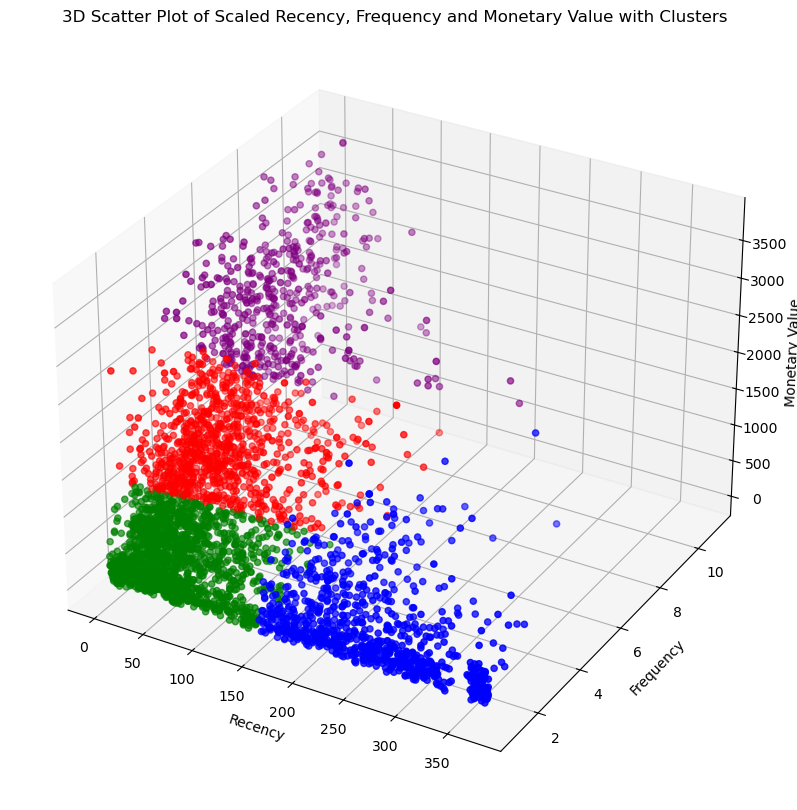

In [41]:
# visualising the clusters

cluster_colors = {0: "red", 1: "blue", 2: "green", 3: "purple"}
colors = non_outliers["Cluster"].map(cluster_colors)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers["Recency"], 
                     non_outliers["Frequency"], 
                     non_outliers["MonetaryValue"], 
                     c=colors,
                     marker='o')

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary Value")

plt.title("3D Scatter Plot of Scaled Recency, Frequency and Monetary Value with Clusters")
plt.show()

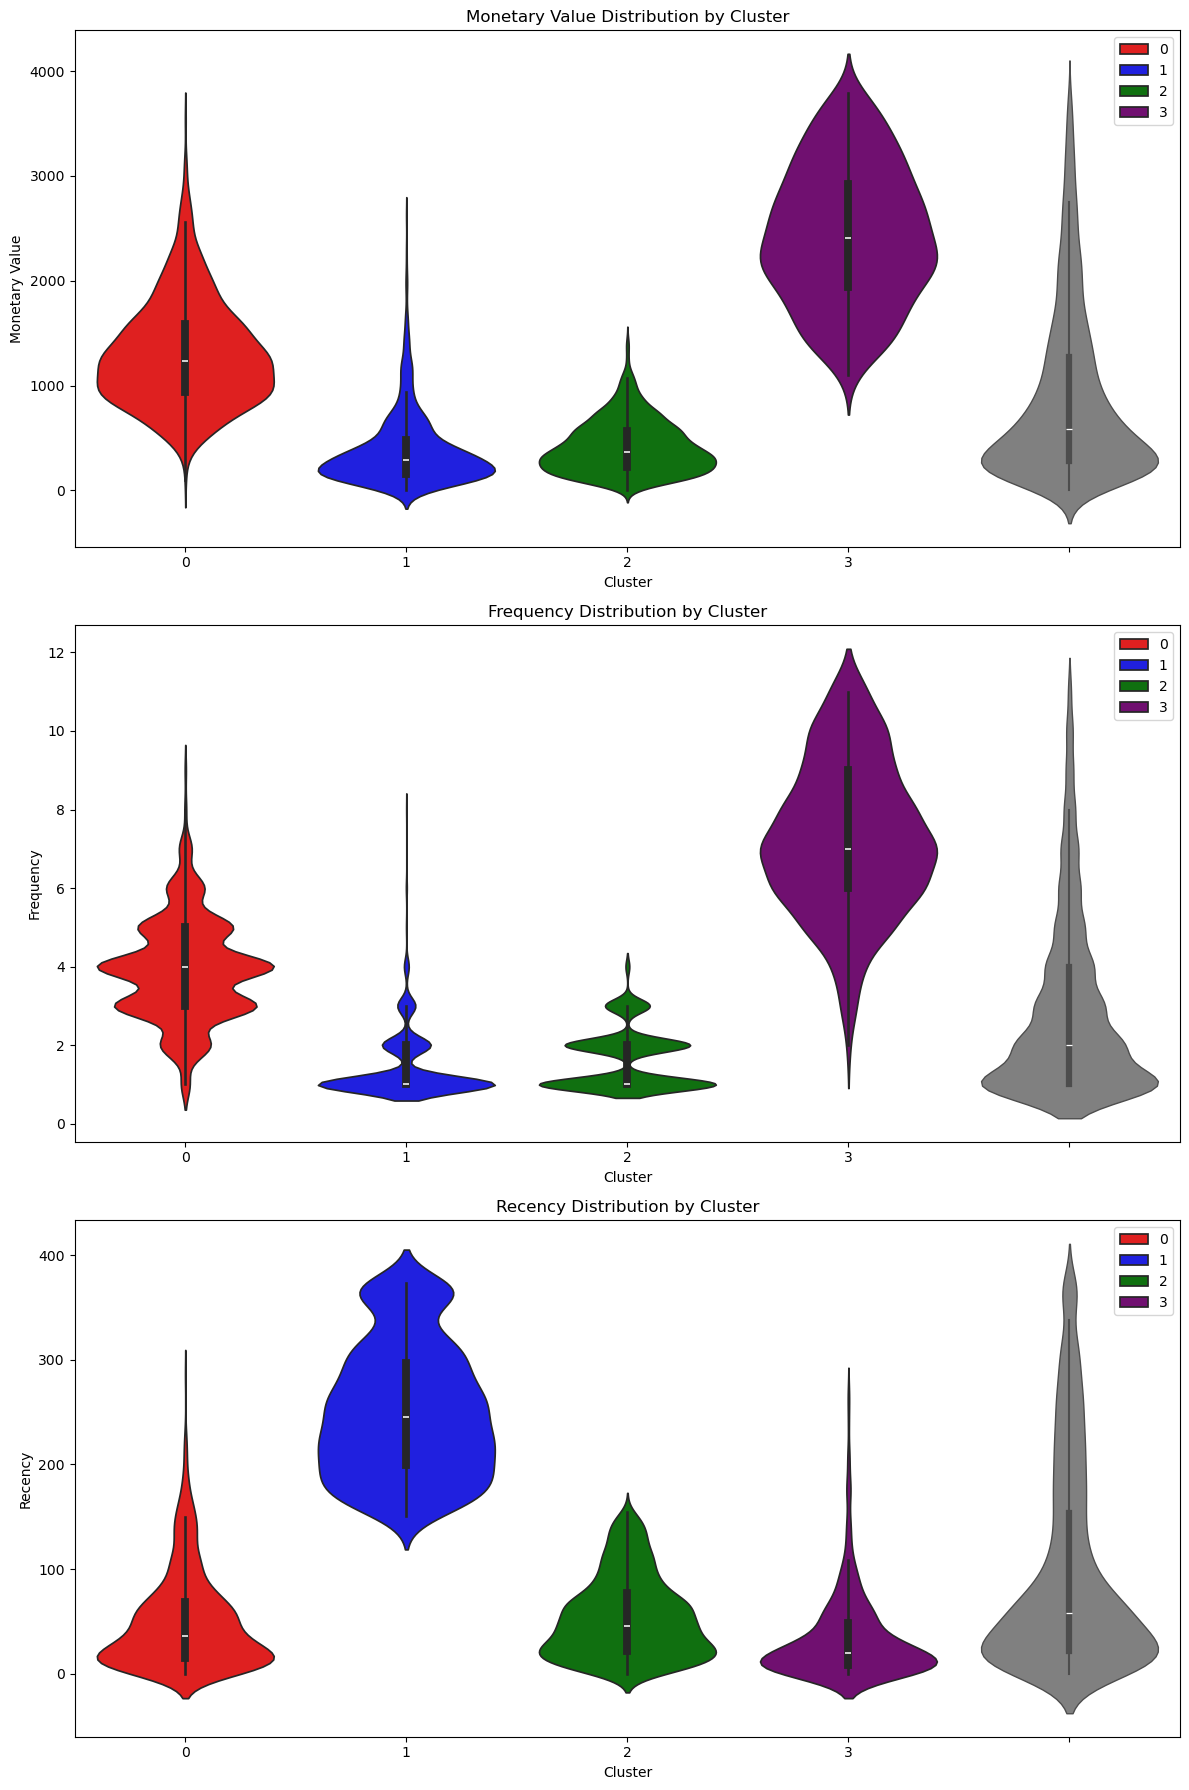

In [43]:
# violin plots of clusters

plt.figure(figsize=(12,18))

plt.subplot(3, 1, 1)
sns.violinplot(x="Cluster", y="MonetaryValue", data=non_outliers, palette=cluster_colors, hue =non_outliers["Cluster"])
sns.violinplot(y=non_outliers["MonetaryValue"], color="gray", linewidth=1.0)
plt.title("Monetary Value Distribution by Cluster")
plt.ylabel("Monetary Value")

plt.subplot(3, 1, 2)
sns.violinplot(x="Cluster", y="Frequency", data=non_outliers, palette=cluster_colors, hue =non_outliers["Cluster"])
sns.violinplot(y=non_outliers["Frequency"], color="gray", linewidth=1.0)
plt.title("Frequency Distribution by Cluster")
plt.ylabel("Frequency")

plt.subplot(3, 1, 3)
sns.violinplot(x="Cluster", y="Recency", data=non_outliers, palette=cluster_colors, hue =non_outliers["Cluster"])
sns.violinplot(y=non_outliers["Recency"], color="gray", linewidth=1.0)
plt.title("Recency Distribution by Cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()

# Interpret Clusters and give them meaningful names

1. Cluster 0 (Red): "Retain"
- Rationale: high-value customers who purchase regularly, though not always very recently. Focus on retention efforts to maintain loyalty and spending levels
- Action: implement loyalty programs, personalised offers, and regular engagement to ensure they remain active

2. Cluster 1 (Blue): "Re-Engage"
- Rationale: lower-value, infrequenet buyers who haven't purchased recently. Focus on re-engagement to bring them back into active purchasing behaviour
- Action@ targeted marketing campaigns, special discounts, reminders to engcourage

3. Cluster 2 (Green): "Nurture"
- Rationale: least active, lowest value customers but have made recent purchases. May be new or need nurturing to increase engagement
- Action: customer service, offer incentives to encourage more frequent purchases

4. Cluster 3 (Yellow): "Reward"
- Rationale: high value, very frequent buyers, many who are still actively purchasing. Most loyal customers and should reward to keep engagement
- Action: robust loyalty program, exclusive offers, early access to new products

# Conclusion
- Cluster 0 (Red): "Retain"
- Cluster 1 (Blue): "Re-Engage"
- Cluster 2 (Green): "Nurture"
- Cluster 3 (Yellow): "Reward"

# Outlier Analysis

In [44]:
overlap_indices = monetary_outliers.index.intersection(frequency_outliers.index)

overlap_indices

Index([  65,   84,   85,   92,  126,  145,  164,  179,  202,  203,
       ...
       4107, 4125, 4143, 4156, 4200, 4235, 4236, 4237, 4241, 4262],
      dtype='int64', length=226)

In [46]:
monetary_only_outliers = monetary_outliers.drop(overlap_indices)
frequency_only_outliers = frequency_outliers.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

In [47]:
outlier_clusters = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

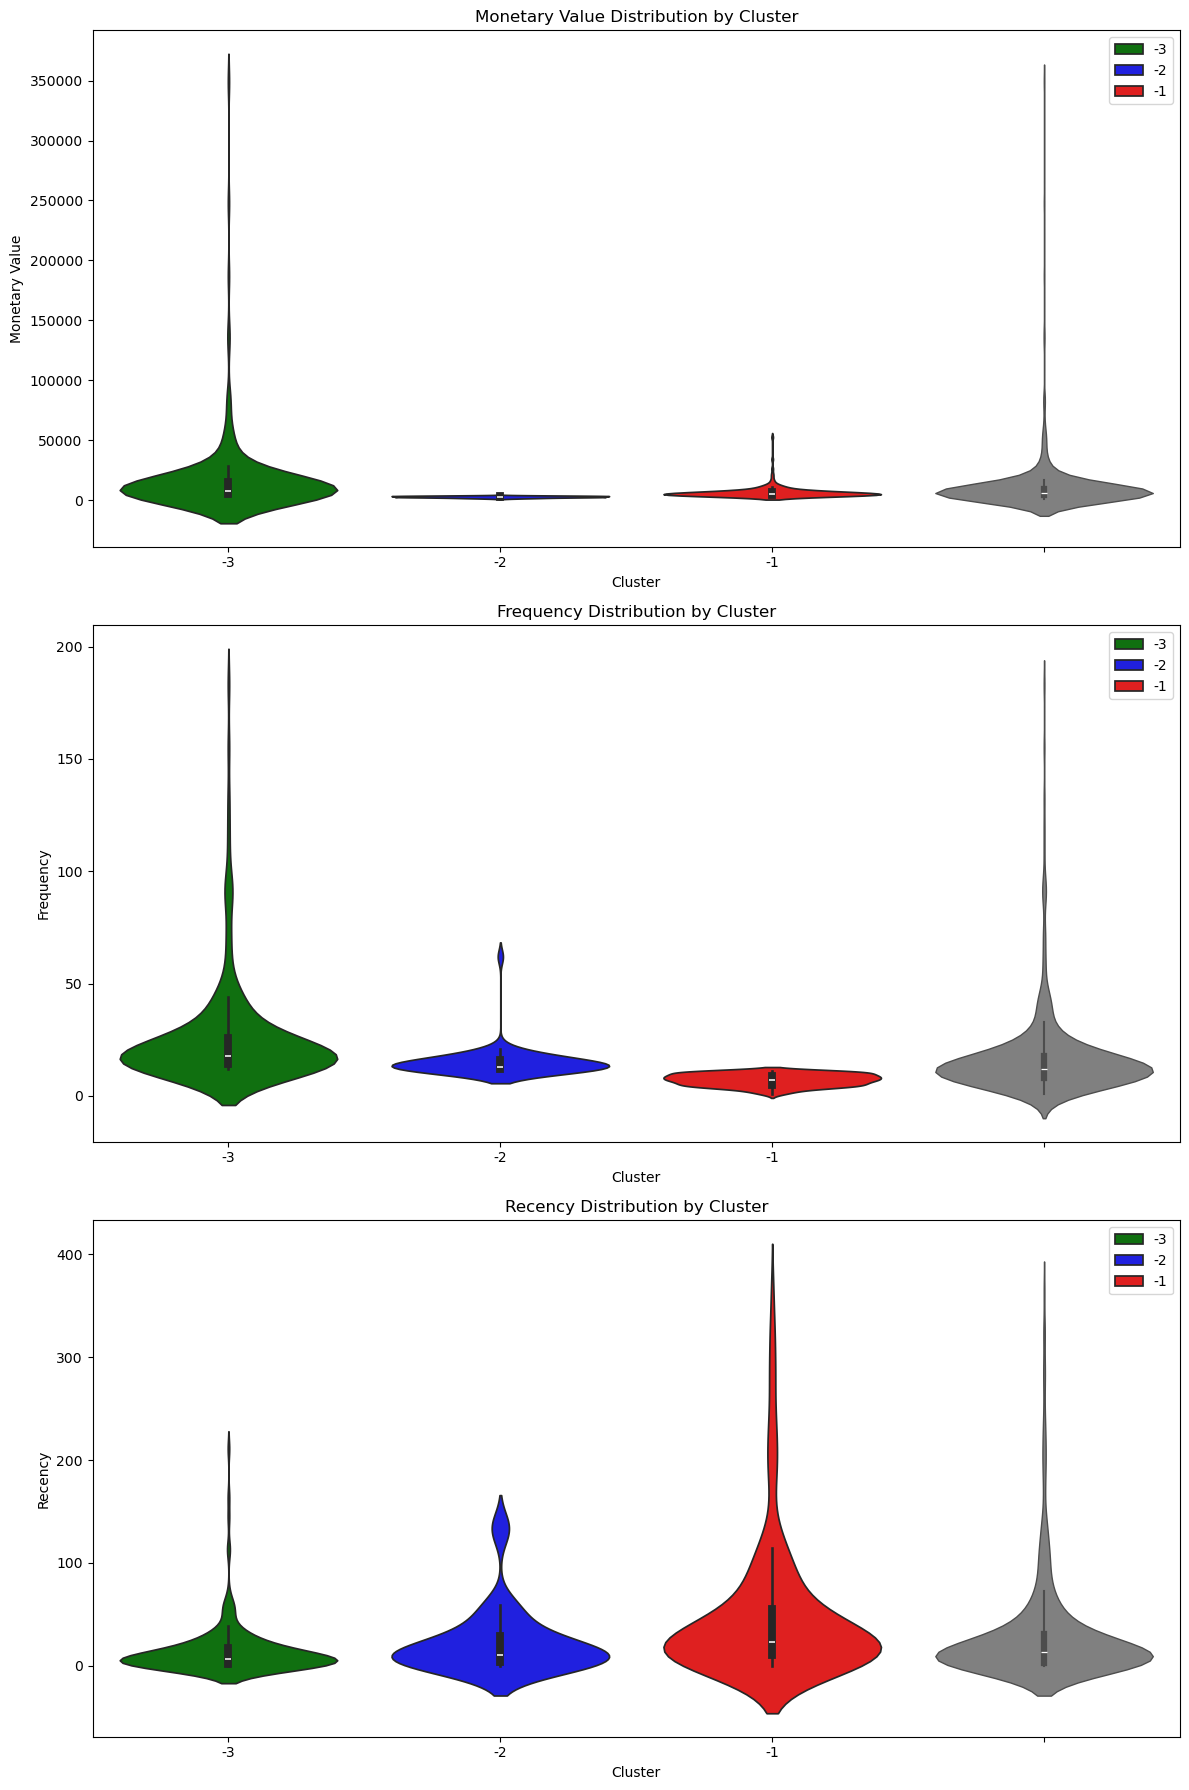

In [49]:
# visualising the outlier clusters using violinplot

cluster_colors = {-1: "red", -2: "blue", -3: "green"}
colors = outlier_clusters["Cluster"].map(cluster_colors)

plt.figure(figsize=(12,18))

plt.subplot(3, 1, 1)
sns.violinplot(x="Cluster", y="MonetaryValue", data=outlier_clusters, palette=cluster_colors, hue =outlier_clusters["Cluster"])
sns.violinplot(y=outlier_clusters["MonetaryValue"], color="gray", linewidth=1.0)
plt.title("Monetary Value Distribution by Cluster")
plt.ylabel("Monetary Value")

plt.subplot(3, 1, 2)
sns.violinplot(x="Cluster", y="Frequency", data=outlier_clusters, palette=cluster_colors, hue =outlier_clusters["Cluster"])
sns.violinplot(y=outlier_clusters["Frequency"], color="gray", linewidth=1.0)
plt.title("Frequency Distribution by Cluster")
plt.ylabel("Frequency")

plt.subplot(3, 1, 3)
sns.violinplot(x="Cluster", y="Recency", data=outlier_clusters, palette=cluster_colors, hue =outlier_clusters["Cluster"])
sns.violinplot(y=outlier_clusters["Recency"], color="gray", linewidth=1.0)
plt.title("Recency Distribution by Cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()


# Analysis for Outliers

- Cluster -1 (Monetary Outliers) PAMPER : High money spenders but low frequency. Recency ranges a lot but most are fairly recent. Possibly one time buyers of bulky orders. Either loyalty programs or luxury services

- Cluster -2 (Frequency Outliers) UPSELL : High frequency buyers who do not spend much. Majority of the customers buy the products fairly recently but there are some who have not bought in a long time. They may be buying low value items or may be buying in bulk. Targeted marketing campaigns or discounts may help increase their spending. Possibly bundle deals or discounts on bulk orders.

- Cluster -3 (High Value Outliers) DELIGHT : customers who spend a lot and buy very frequently. Although most have stayed on recently, there are some who have not bought in a long time. They are the most valuable customers and should be rewarded to keep them engaged. VIP programs or exclusive offers.

In [50]:
cluster_lables = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [51]:
full_clustering = pd.concat([non_outliers, outlier_clusters])

In [52]:
full_clustering["ClusterLabel"] = full_clustering["Cluster"].map(cluster_lables)

# Visualisation

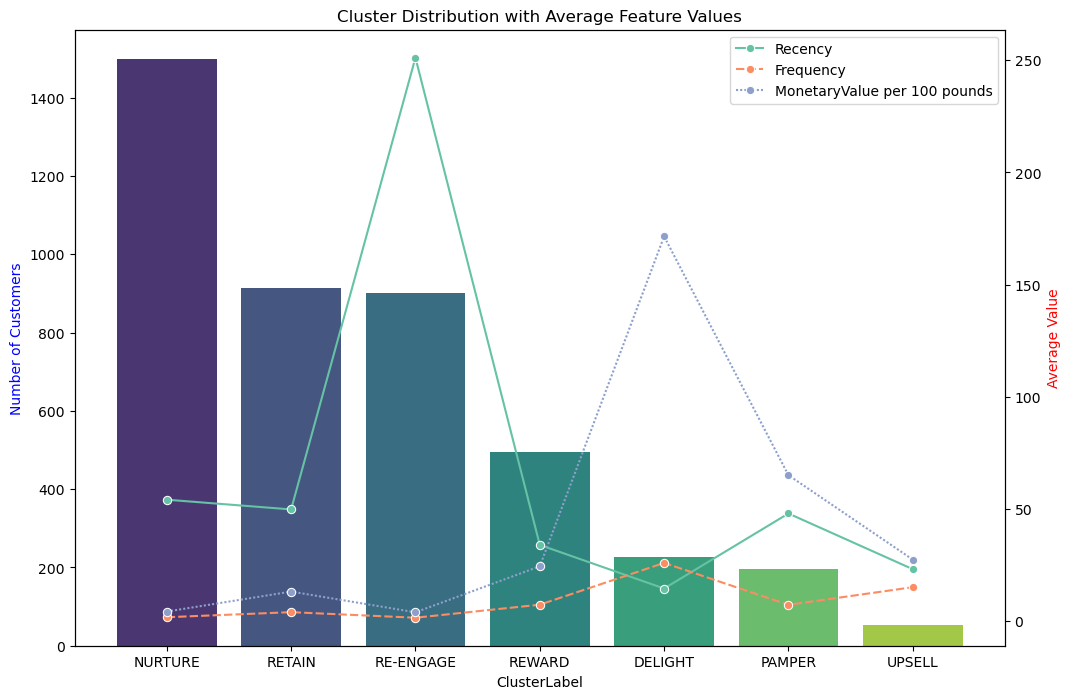

In [55]:
cluster_counts = full_clustering["ClusterLabel"].value_counts()
full_clustering["MonetaryValue per 100 pounds"] = full_clustering["MonetaryValue"] / 100
feature_means = full_clustering.groupby("ClusterLabel")[["Recency", "Frequency", "MonetaryValue per 100 pounds"]].mean()

fig1, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette="viridis", hue=cluster_counts.index)
ax1.set_ylabel("Number of Customers", color="blue")
ax1.set_title("Cluster Distribution with Average Feature Values")

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette="Set2", marker='o')
ax2.set_ylabel("Average Value", color="red")

plt.show()